<a href="https://colab.research.google.com/github/Disha-Panda/Dimond_cut_color_prediction/blob/main/RealVsFake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d uditsharma72/real-vs-fake-faces

 99% 213M/215M [00:10<00:00, 24.0MB/s]
100% 215M/215M [00:10<00:00, 20.8MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/real-vs-fake-faces.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:

import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras import Sequential

In [17]:
import os

# folder path
dir_path = r'/content/valid/real/'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 120


In [8]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io

In [9]:
datagen = ImageDataGenerator(
        rotation_range = 90,
        horizontal_flip = True,
        vertical_flip=True,
        brightness_range = (0.5, 1.5))

In [13]:
import numpy as np
import os
from PIL import Image
image_directory = r'/content/fake/'
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=120,
                          save_to_dir= r'/content/valid/fake',
                          save_prefix='dr',
                          save_format='jpg'):
    i += 1
    if i > 0:
        break

In [20]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train/',
    labels='inferred',
    label_mode='int',
    batch_size=40,
    image_size=(224,224)
)

Found 1920 files belonging to 3 classes.


In [21]:
valid_ds=keras.utils.image_dataset_from_directory(
    directory='/content/valid/',
    labels='inferred',
    label_mode='int',
    batch_size=40,
    image_size=(224,224)
)

Found 240 files belonging to 3 classes.


In [24]:
def process(image,labels):
  image=tensorflow.cast(image/255.,tensorflow.float32)
  return image,labels

train_ds=train_ds.map(process)
validation_ds=valid_ds.map(process)

In [30]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history=model.fit(train_ds,epochs=10,validation_data=valid_ds)

Epoch 1/10
48/48 [==============================] - 209s 4s/step - loss: -1640.2683 - accuracy: 0.4948 - val_loss: -886.3475 - val_accuracy: 0.5000
Epoch 2/10
48/48 [==============================] - 204s 4s/step - loss: -25528.4277 - accuracy: 0.5000 - val_loss: -9284881.0000 - val_accuracy: 0.5000
Epoch 3/10
48/48 [==============================] - 201s 4s/step - loss: -143814.0781 - accuracy: 0.5000 - val_loss: -198113520.0000 - val_accuracy: 0.5000
Epoch 4/10
48/48 [==============================] - 211s 4s/step - loss: -497546.6250 - accuracy: 0.5000 - val_loss: -749681408.0000 - val_accuracy: 0.5000
Epoch 5/10
48/48 [==============================] - 201s 4s/step - loss: -1325144.1250 - accuracy: 0.5000 - val_loss: -1873803.8750 - val_accuracy: 0.5000
Epoch 6/10
48/48 [==============================] - 197s 4s/step - loss: -2956266.7500 - accuracy: 0.5000 - val_loss: -28615462.0000 - val_accuracy: 0.5000
Epoch 7/10
48/48 [==============================] - 211s 4s/step - loss: -58

In [33]:
import matplotlib.pyplot as plt

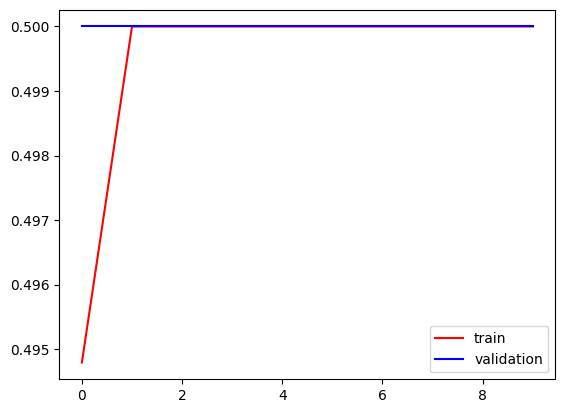

In [34]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


In [35]:
import cv2

In [61]:
test_img=cv2.imread('/content/dr_0_5372.jpg')

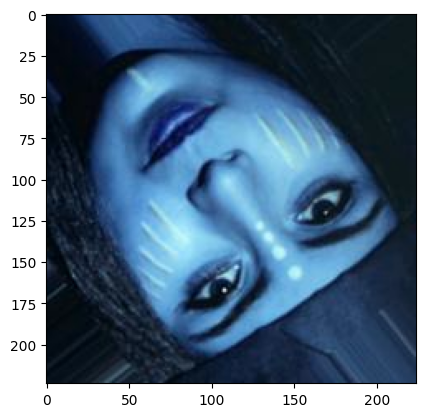

In [62]:
plt.imshow(test_img)

In [63]:
test_img.shape

(224, 224, 3)

In [64]:
test_img=cv2.resize(test_img,(224,224))

In [65]:
test_input=test_img.reshape((1,224,224,3))

In [66]:
model.predict(test_input)

1/1 [==============================] - 0s 45ms/step


array([[1.]], dtype=float32)